In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [113]:
def vscode_settings():
    # Set plot style and size
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 7]
    plt.rcParams['font.size'] = 24
    
    # Set pandas display settings
    pd.options.display.max_columns = None
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    
    # Set seaborn as default for statistical plots
    sns.set()

# Apply settings
vscode_settings()

In [114]:
df_raw = pd.read_csv('health_insurance_cross-sell/data/raw/train.csv')

In [115]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Description

## Check Data Type

In [116]:
df1 = df_raw.copy()

In [117]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Check NA

In [118]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Data Dimensions

In [119]:
print("Number of rows: {}".format(df1.shape[0]))
print("Number of Columns: {}".format(df1.shape[1]))

Number of rows: 381109
Number of Columns: 12


## Descriptive Statistical

<span style="font-size:15px">To begin, I'll separate the numerical and categorical variables, as each set requires a distinct approach to analysis.</span>

### Numerical Attributes

In [120]:
num_attributes = df1[['Age', 'Annual_Premium', 'Vintage']]

In [121]:
#mean median

ct1 = pd.DataFrame(num_attributes.apply(lambda x: x.mean())).T
ct2 = pd.DataFrame(num_attributes.apply(lambda x: x.median())).T

#Dispersion - Std, Min, Max, Range, Skew, Kurtosis

d1 = pd.DataFrame(num_attributes.apply(lambda x: x.std())).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.min())).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Age,20.0,85.0,65.0,38.822584,36.0,15.511611,0.672539,-0.565655
1,Annual_Premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.155057,1.766087,34.004569
2,Vintage,10.0,299.0,289.0,154.347397,154.0,83.671304,0.003030,-1.200688


- The annual_premium variable shows high kurtosis, indicating that most data points are concentrated in a small range with low dispersion. This suggests a high concentration of premiums around the lower end, with occasional very high premiums.  
- The maximum premium value is Rs. 540,165, approximately $7,000 USD (based on the 2020 exchange rate).  
- The vintage variable does not reach a full year within this dataset.

### Categorical Attributes

In [122]:
cat_attributes = df1[['Gender', 'Driving_License', 'Region_Code', 'Policy_Sales_Channel', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Previously_Insured']]

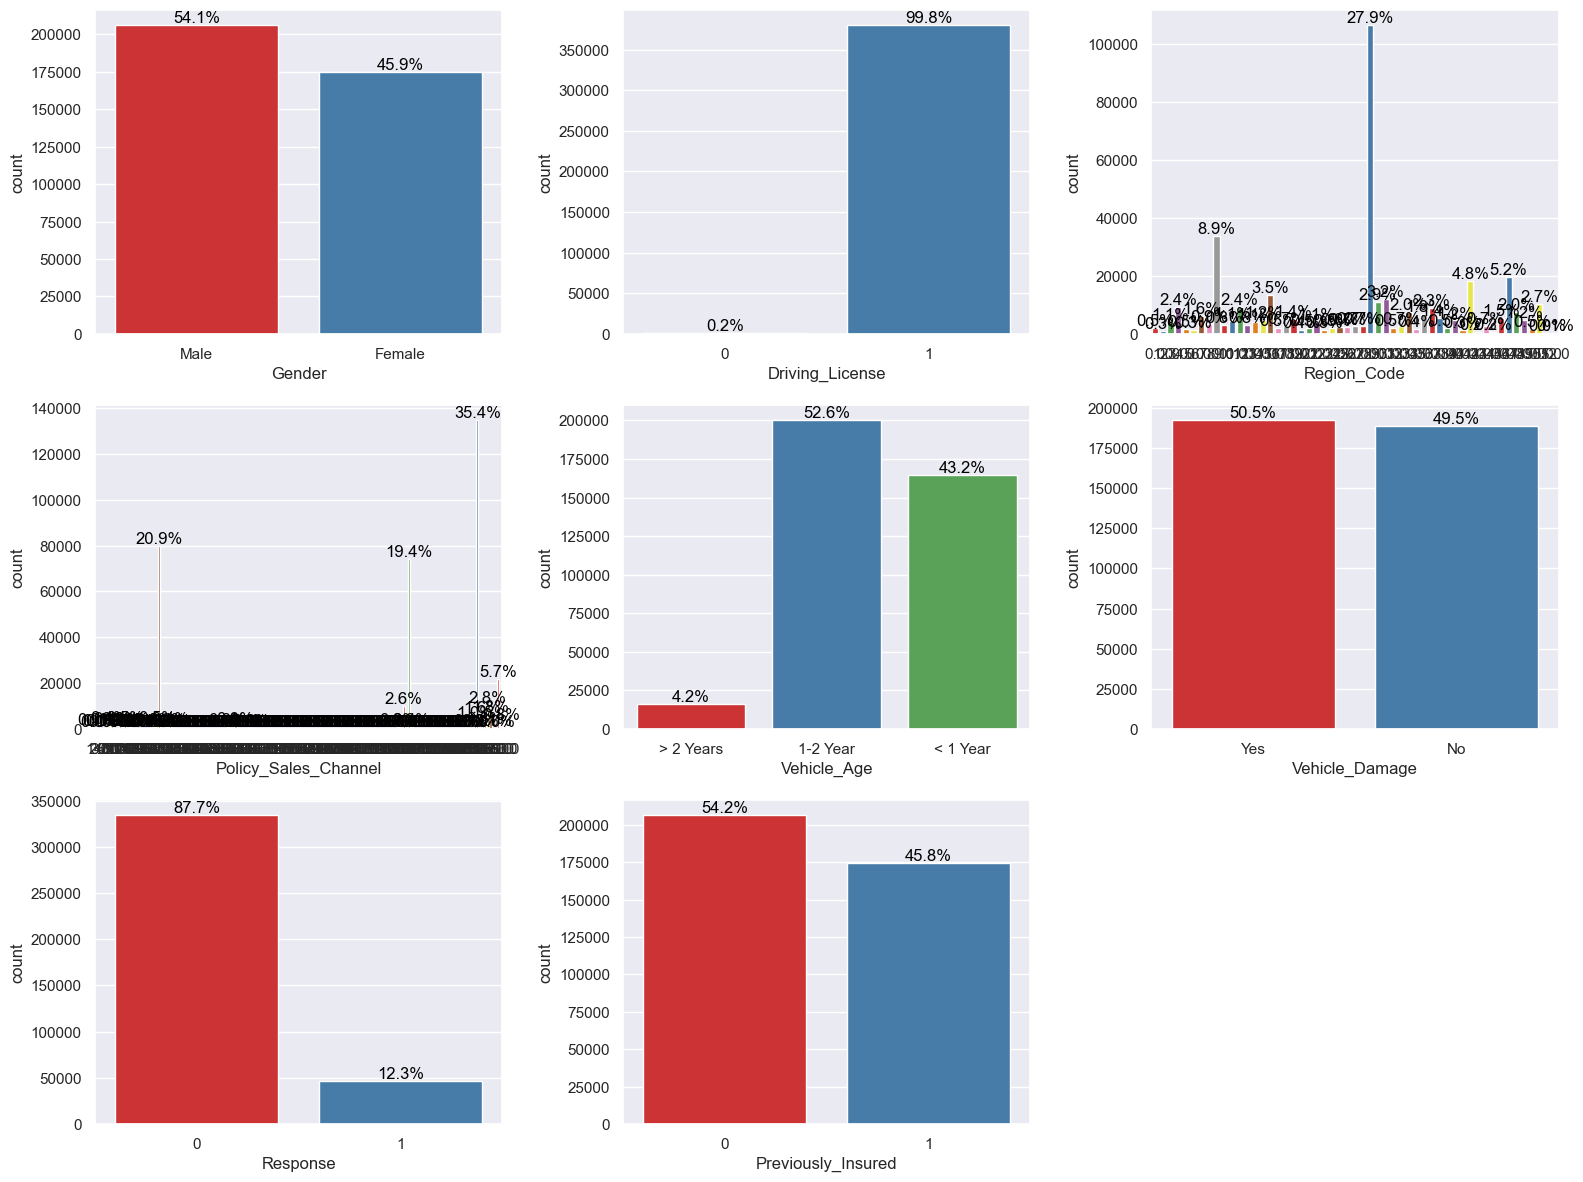

In [123]:
# Set the figure size
plt.figure(figsize=(16, 12))

# Function to add percentages on top of the bars
def add_percentages(ax, df):
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Create the countplots with different colors and add percentages

# Plot 1: Gender
plt.subplot(3, 3, 1)
ax1 = sns.countplot(x='Gender', data=cat_attributes, palette='Set1')
add_percentages(ax1, cat_attributes)

# Plot 2: Driving_License
plt.subplot(3, 3, 2)
ax2 = sns.countplot(x='Driving_License', data=cat_attributes, palette='Set1')
add_percentages(ax2, cat_attributes)

# Plot 3: Region_Code
plt.subplot(3, 3, 3)
ax3 = sns.countplot(x='Region_Code', data=cat_attributes, palette='Set1')
add_percentages(ax3, cat_attributes)

# Plot 4: Policy_Sales_Channel
plt.subplot(3, 3, 4)
ax4 = sns.countplot(x='Policy_Sales_Channel', data=cat_attributes, palette='Set1')
add_percentages(ax4, cat_attributes)

# Plot 5: Vehicle_Age
plt.subplot(3, 3, 5)
ax5 = sns.countplot(x='Vehicle_Age', data=cat_attributes, palette='Set1')
add_percentages(ax5, cat_attributes)

# Plot 6: Vehicle_Damage
plt.subplot(3, 3, 6)
ax6 = sns.countplot(x='Vehicle_Damage', data=cat_attributes, palette='Set1')
add_percentages(ax6, cat_attributes)

# Plot 7: Response
plt.subplot(3, 3, 7)
ax7 = sns.countplot(x='Response', data=cat_attributes, palette='Set1')
add_percentages(ax7, cat_attributes)

# Plot 8: Previously_Insured
plt.subplot(3, 3, 8)
ax8 = sns.countplot(x='Previously_Insured', data=cat_attributes, palette='Set1')
add_percentages(ax8, cat_attributes)

# Show the plot
plt.tight_layout()
plt.show()

<span style="font-size:15px">We are working with imbalanced data, with only 12.3% of instances indicating interest in vehicle insurance.</span>

# Feature Engineering

In [124]:
df2 = df1.copy()

In [125]:
# Initialize the OneHotEncoder
#encoder = OneHotEncoder(sparse=False, drop='first')  # sparse=False for dense output, drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'Gender' column
gender_encoded = encoder.fit_transform(df2[['Gender']])

# Convert the result into a DataFrame and add it to the original DataFrame
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate the original DataFrame with the encoded column(s)
df_train = pd.concat([df2, gender_encoded_df], axis=1).drop('Gender', axis=1)

# Fit and transform the 'Vehicle_Damage' column
vehicle_dameged_encoded = encoder.fit_transform(df_train[['Vehicle_Damage']])

# Convert the result into a DataFrame and add it to the original DataFrame
vehicle_dameged_encoded_df = pd.DataFrame(vehicle_dameged_encoded, columns=encoder.get_feature_names_out(['Vehicle_Damage']))

# Concatenate the original DataFrame with the encoded column(s)
df2 = pd.concat([df2, vehicle_dameged_encoded_df], axis=1).drop('Vehicle_Damage', axis=1)

In [126]:
# Convert column names to snake_case
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [127]:
# Create a mapping dictionary
vehicle_age_mapping = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

# Apply the mapping to the 'vehicle_age' column
df2['vehicle_age_numeric'] = df2['vehicle_age'].map(vehicle_age_mapping)

df2 = df2.drop('vehicle_age', axis=1)

In [128]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,vehicle_damage_yes,vehicle_age_numeric
0,1,Male,44,1,28.0,0,40454.0,26.0,217,1,1.0,2
1,2,Male,76,1,3.0,0,33536.0,26.0,183,0,0.0,1
2,3,Male,47,1,28.0,0,38294.0,26.0,27,1,1.0,2
3,4,Male,21,1,11.0,1,28619.0,152.0,203,0,0.0,0
4,5,Female,29,1,41.0,1,27496.0,152.0,39,0,0.0,0


## Driving License

In [129]:
# Driving License

aux = df2[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


In [130]:
# Non Driving License

aux1 = df2[['driving_license', 'response']][df2['driving_license'] == 0]
aux = aux1[['driving_license', 'response']].groupby('response').count().reset_index()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,771,0.949507
1,1,41,0.050493


<span style="font-size:15px">Since the proportion of non-driving license holders is very small (only 0.2% of the total) and vehicle insurance is more relevant for drivers, we will remove these records from our dataset.</span>

In [131]:
# Filter non-driving license values and remove 'driving_license' column
df2 = df2[df2['driving_license'] == 1].drop('driving_license', axis=1)

In [132]:
# Save preprocessed dataset for EDA
df2.to_parquet('data/df_preprocessed.parquet', index=False)

# Exploratory Data Analysis

In [133]:
df3 = pd.read_parquet('data/df_preprocessed.parquet')
df3.head()

,id,gender,age,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,vehicle_damage_yes,vehicle_age_numeric
0,1,Male,44,28.0,0,40454.0,26.0,217,1,1.0,2
1,2,Male,76,3.0,0,33536.0,26.0,183,0,0.0,1
2,3,Male,47,28.0,0,38294.0,26.0,27,1,1.0,2
3,4,Male,21,11.0,1,28619.0,152.0,203,0,0.0,0
4,5,Female,29,41.0,1,27496.0,152.0,39,0,0.0,0


## Univariate Analysis

### Response Variable

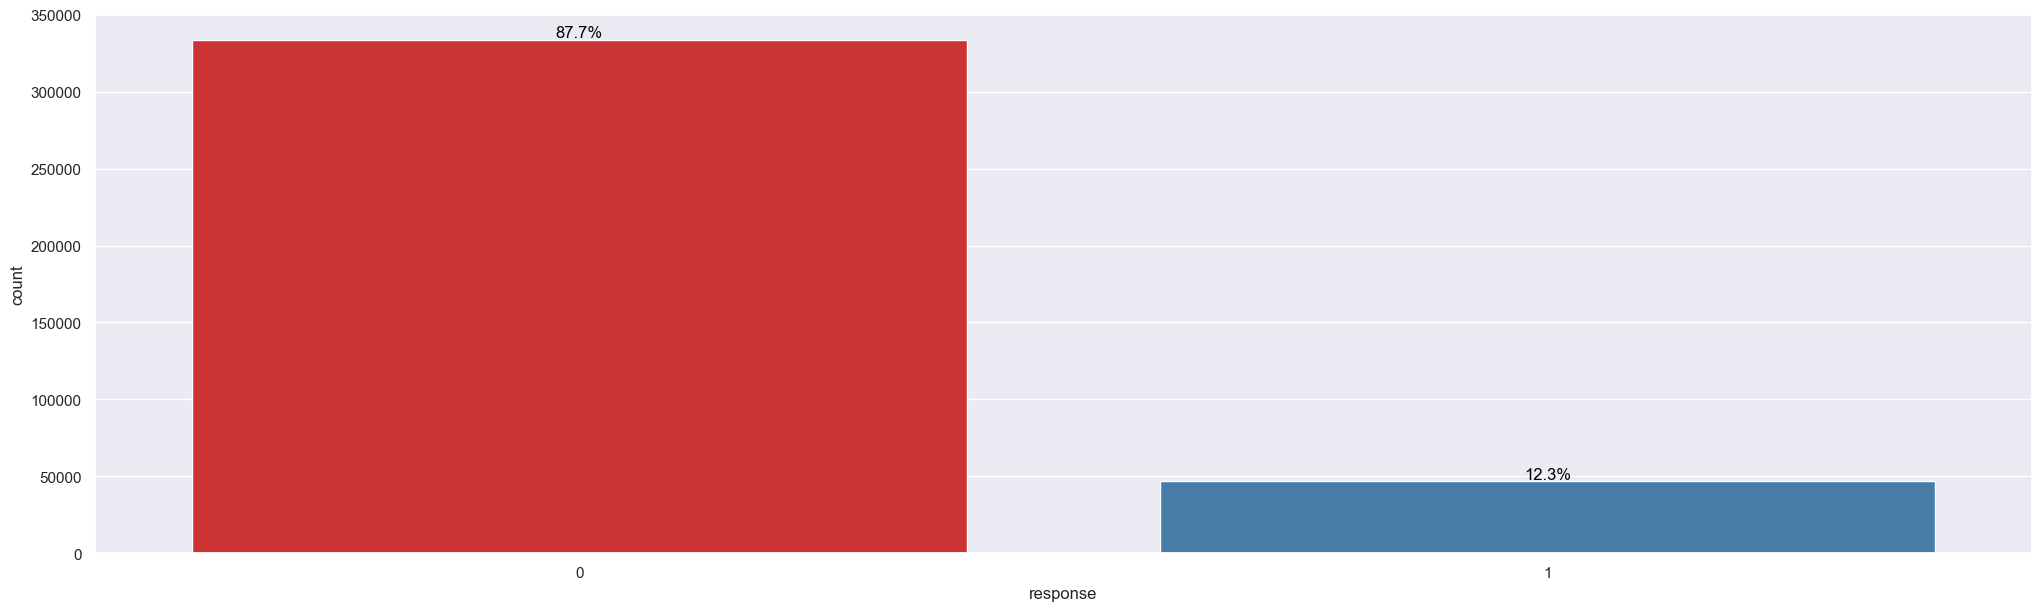

In [134]:
ax4 = sns.countplot(x='response', data=df3, palette='Set1')
add_percentages(ax4, df3)

### Numerical Features

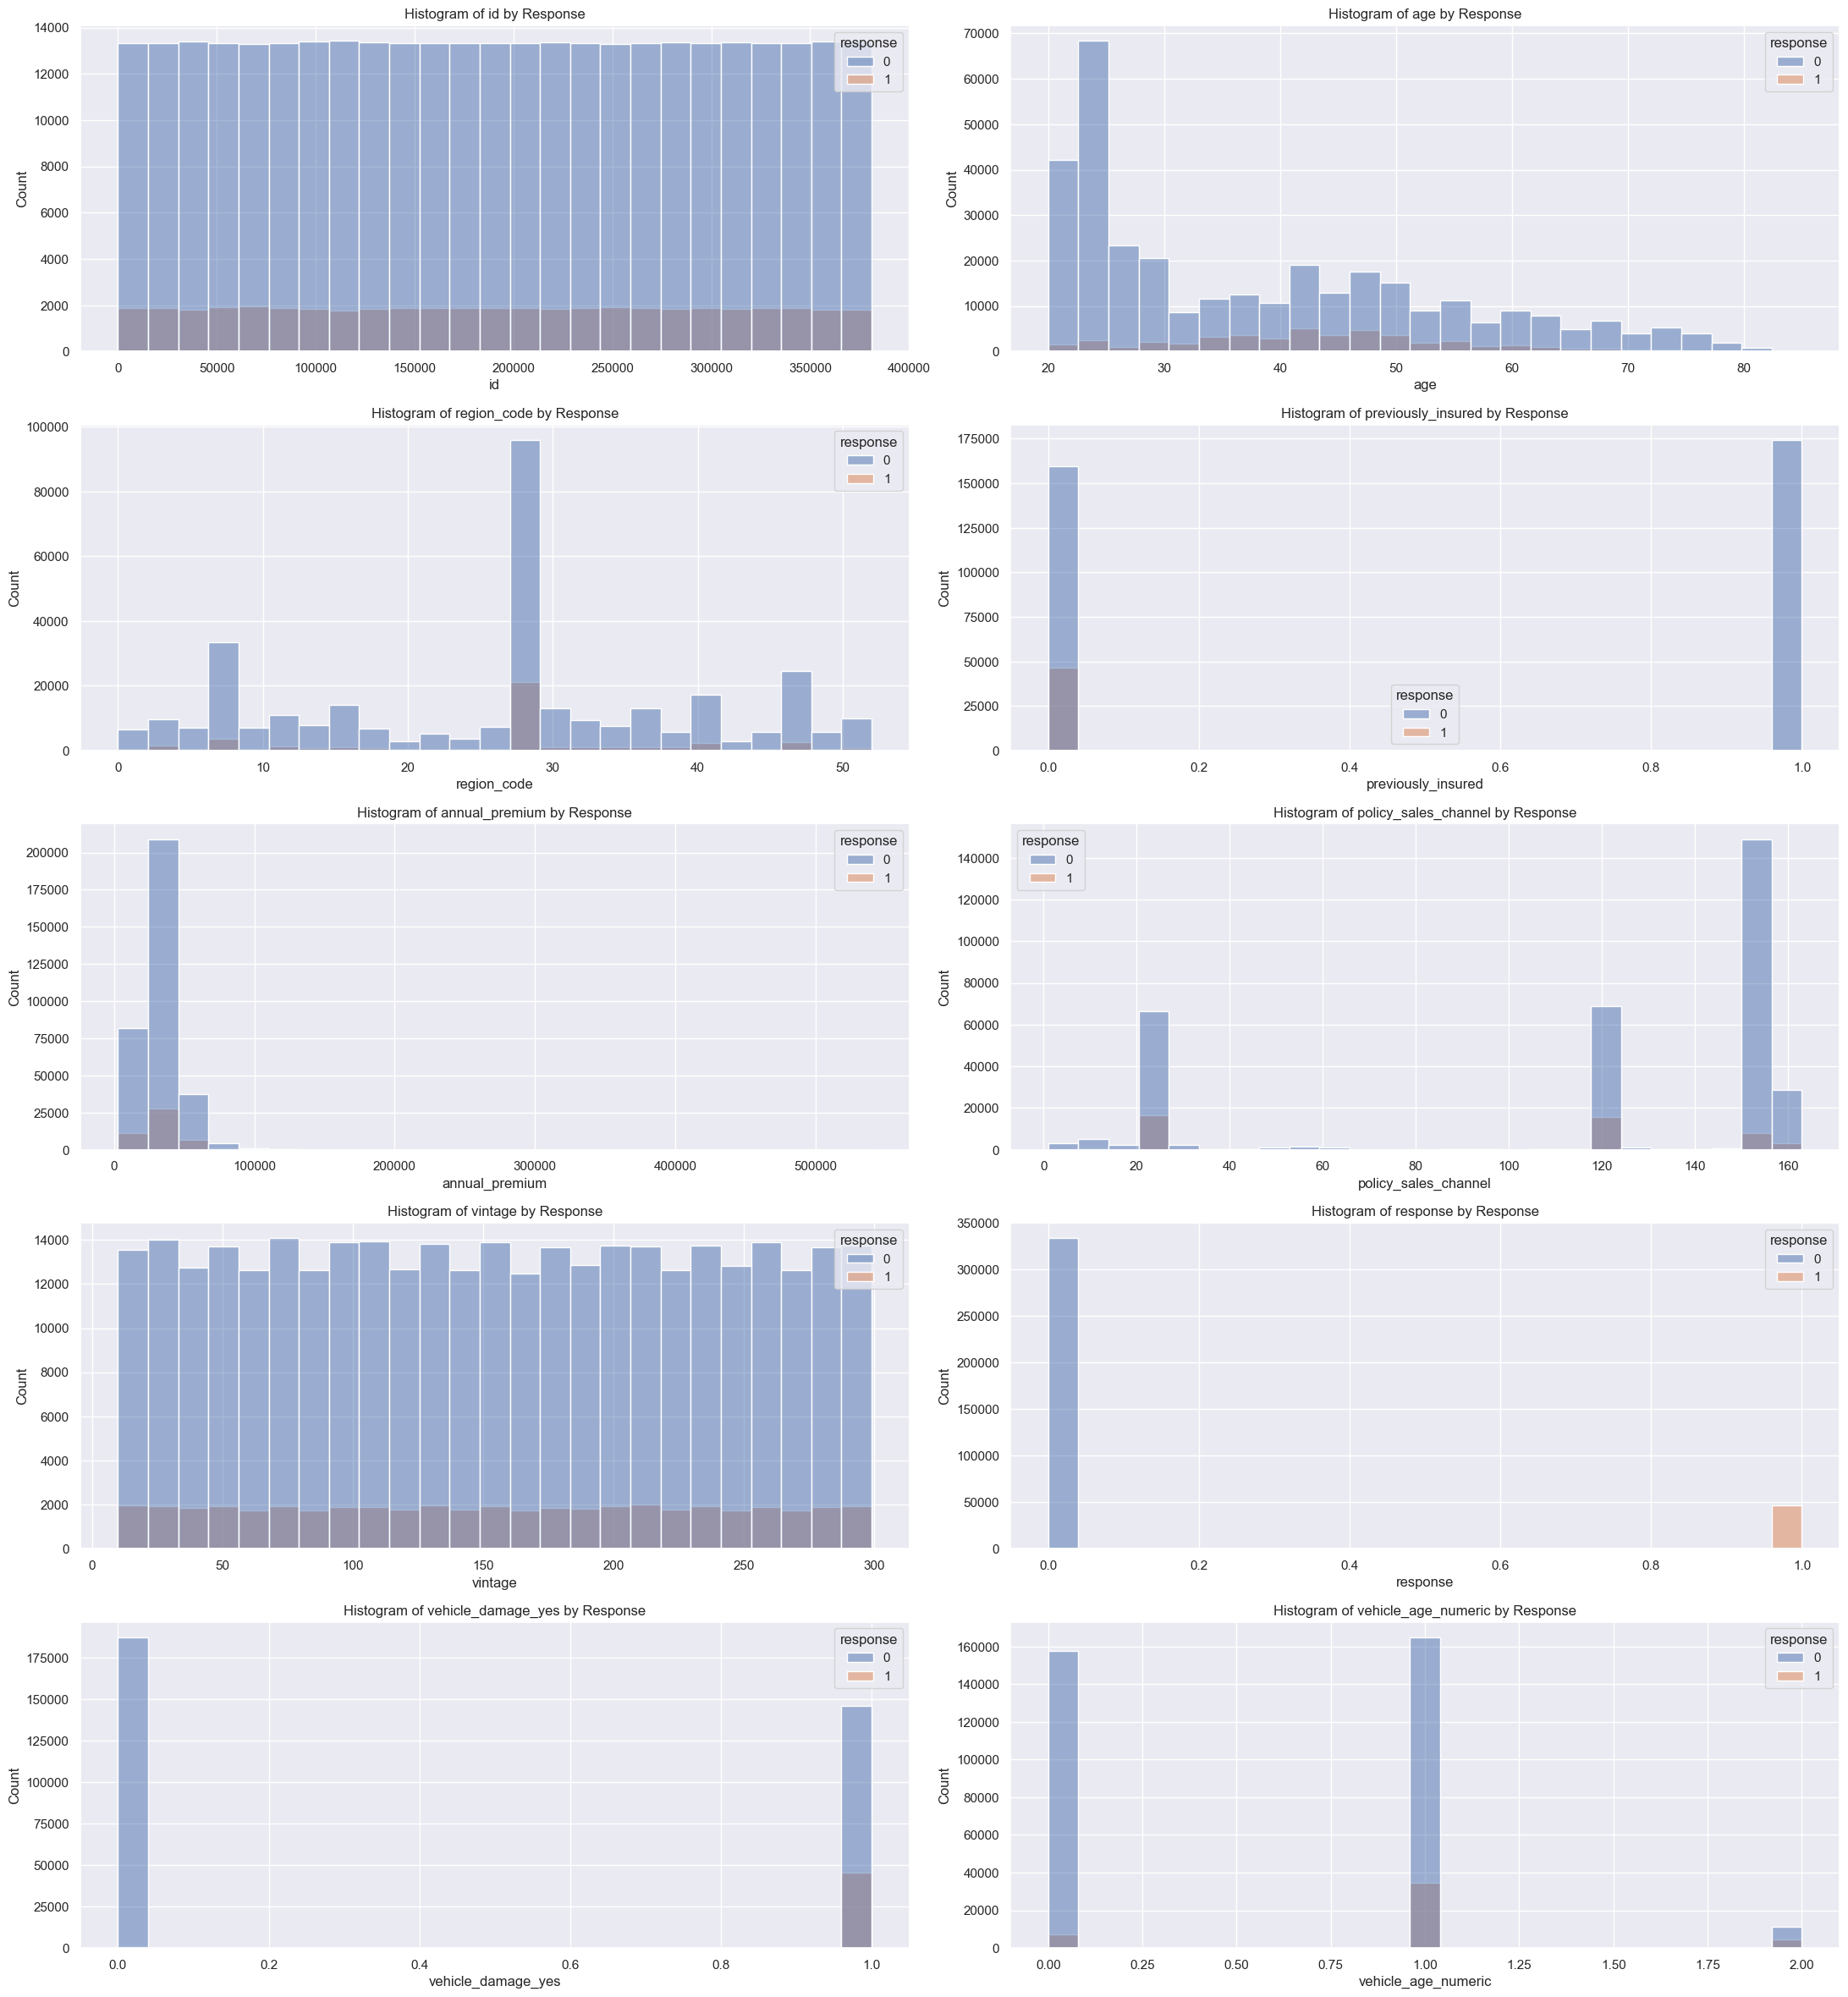

In [135]:
# List of numerical columns
num_attributes = df3.select_dtypes(include=['int64', 'float64'])
columns = num_attributes.columns.to_list()

# Create a figure with a 6x2 grid (12 subplots)
fig, axes = plt.subplots(6, 2, figsize=(22, 28))  # Adjust the size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each numerical column and plot it on its respective subplot
for i, column in enumerate(columns):
    sns.histplot(x=column, data=df3, hue='response', bins=25, ax=axes[i])
    axes[i].set_title(f'Histogram of {column} by Response')

# Remove any empty subplots if there are fewer than 12 columns
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<span style="font-size:15px">The metrics that appear relevant for identifying positive responses include:

- <b>Age:</b> Positive responses (1) are more concentrated among individuals aged 40–50, whereas negative responses (0) are more common among those aged 20–30.
- <b>Previously Insured:</b> Positive responses (1) are almost exclusively from those without prior insurance (previously_insured = 0), while negative responses (0) are evenly distributed between previously insured and non-insured individuals.
- <b>Vehicle Damage:</b> Positive responses (1) are concentrated among drivers with vehicle damage (vehicle_damage_yes = 1), whereas negative responses (0) are evenly distributed between those with and without vehicle damage.
- <b>Policy Sales Channel:</b> Positive responses (1) are mostly associated with sales channels 124 and 26, while negative responses (0) are primarily linked to channel 152.</span>

## Bivariate Analysis

### Age

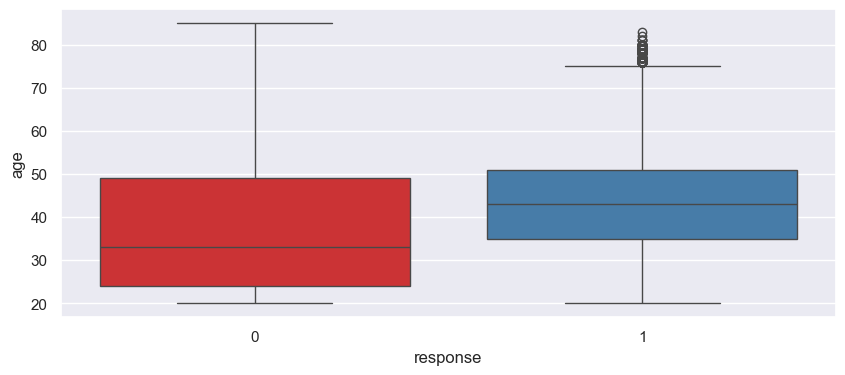

In [136]:
# Age
plt.figure(figsize= (10, 4))
sns.boxplot(x='response', y='age', data=df3, palette='Set1');

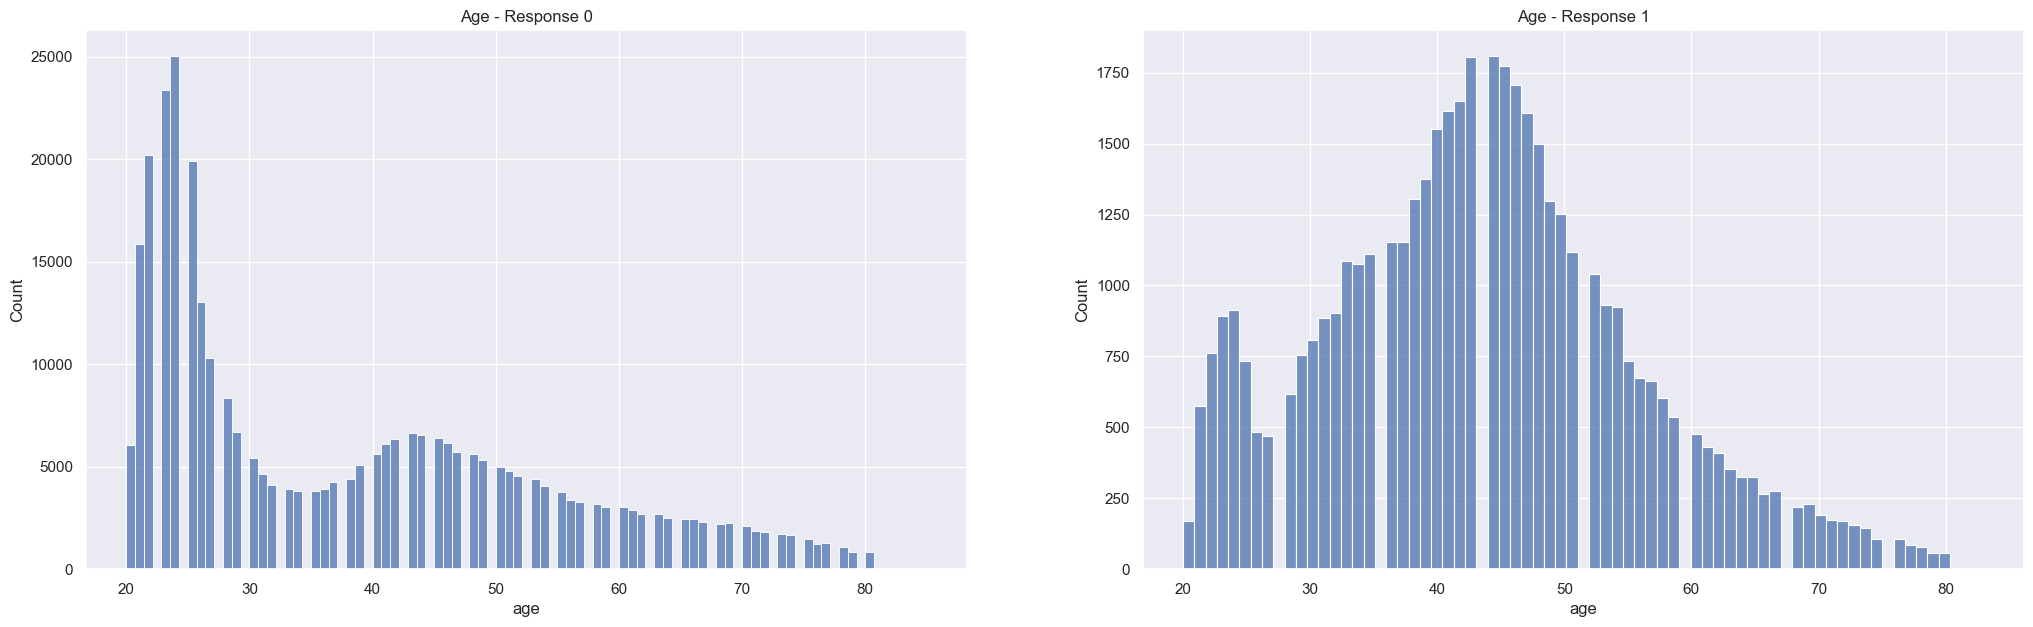

<Figure size 1000x400 with 0 Axes>

In [137]:
# Age histogram
fig, axes = plt.subplots(1,2)
plt.figure(figsize= (10, 4))

aux1 = df3.loc[df3['response'] == 0, 'age']
aux2 = df3.loc[df3['response'] == 1, 'age']

sns.histplot(aux1, ax = axes.ravel()[0]);
sns.histplot(aux2, ax = axes.ravel()[1]);

axes.ravel()[0].set_title('Age - Response 0');
axes.ravel()[1].set_title('Age - Response 1');

<span style="font-size:15px">As identified in the previous step, the age feature appears to be highly relevant for the classifier model.</span>

### Annual Premium

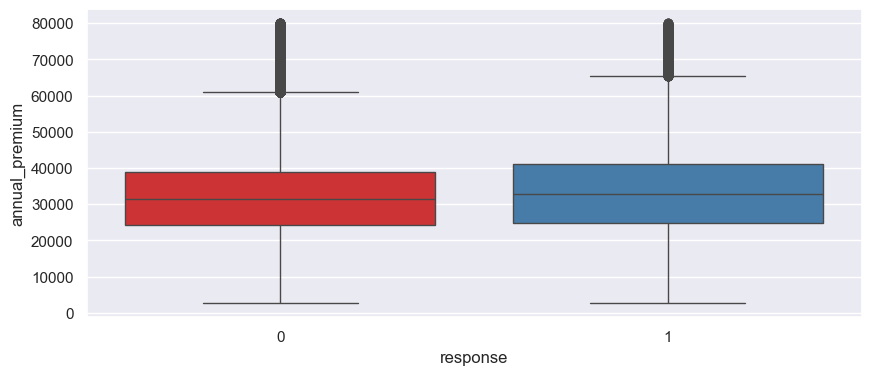

In [138]:
# Annual Premium
aux = df3[df3['annual_premium'] < 80000]

plt.figure(figsize= (10, 4))
sns.boxplot(x='response', y='annual_premium', data=aux, palette='Set1');

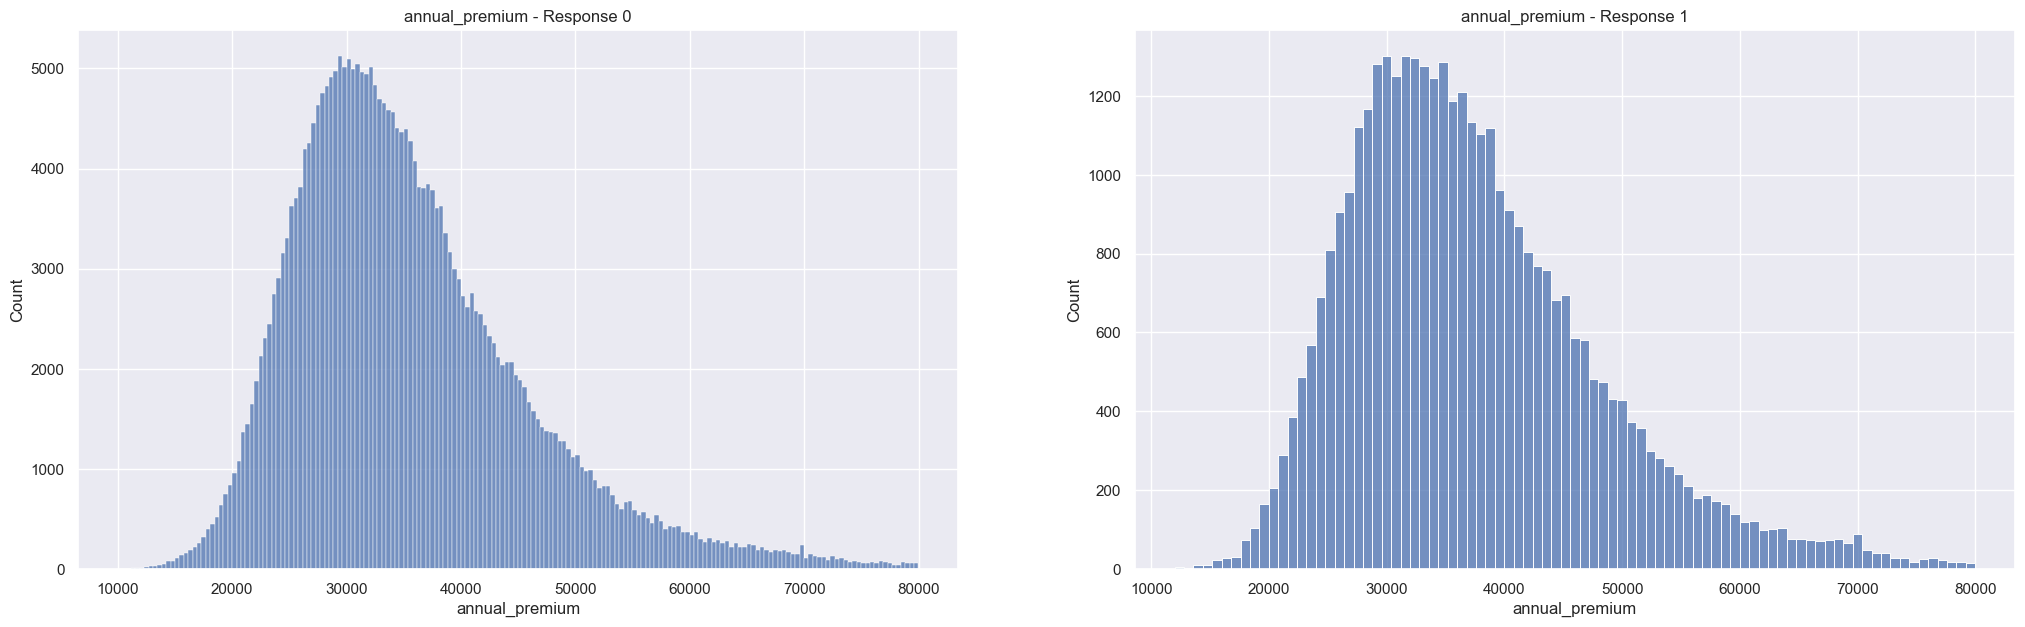

<Figure size 1000x400 with 0 Axes>

In [139]:
# Annual Premium Histogram
fig, axes = plt.subplots(1,2)
plt.figure(figsize= (10, 4))

aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]

aux1 = aux.loc[aux['response'] == 0, 'annual_premium']
aux2 = aux.loc[aux['response'] == 1, 'annual_premium']

sns.histplot(aux1, ax = axes.ravel()[0]);
sns.histplot(aux2, ax = axes.ravel()[1]);

axes.ravel()[0].set_title('annual_premium - Response 0');
axes.ravel()[1].set_title('annual_premium - Response 1');

<span style="font-size:15px">The distributions are quite similar, indicating that this feature may not be particularly useful for the classification model on its own. However, it could be more helpful when combined with other features.</span>

### Region Code

In [168]:
aux = df3['region_code'].value_counts().reset_index()
aux.columns = ['region_code', 'count']
aux['cumulative'] = aux['count'].cumsum()
aux['total'] = aux['count'].sum()
aux['percentage'] = (aux['count'] / aux['total']) * 100
aux['cumulative_percentage'] = (aux['cumulative'] / aux['total']) * 100
aux = aux[['region_code', 'count', 'percentage', 'cumulative_percentage']]
aux.head()

,region_code,count,percentage,cumulative_percentage
0,28.0,106062,27.889255,27.889255
1,8.0,33802,8.888316,36.777571
2,46.0,19719,5.185158,41.962729
3,41.0,18231,4.793885,46.756614
4,15.0,13286,3.493585,50.250199


<span style="font-size:15px">50% of all drivers are concentrated in the top five region codes: 28, 8, 46, 41, and 15.</span>

In [172]:
aux = df3[df3['response'] == 1]['region_code'].value_counts().reset_index()
aux.columns = ['region_code', 'count']
aux['cumulative'] = aux['count'].cumsum()
aux['total'] = aux['count'].sum()
aux['percentage'] = (aux['count'] / aux['total']) * 100
aux['cumulative_percentage'] = (aux['cumulative'] / aux['total']) * 100
aux = aux[['region_code', 'count', 'percentage', 'cumulative_percentage']]
aux.head()

,region_code,count,percentage,cumulative_percentage
0,28.0,19900,42.640725,42.640725
1,8.0,3251,6.966080,49.606805
2,41.0,2222,4.761191,54.367996
3,46.0,2030,4.349783,58.717778
4,29.0,1361,2.916283,61.634061


<span style="font-size:15px">50% of all positive responses are concentrated in the top two region codes: 28, and 8.</span>

In [170]:
aux = df3[df3['response'] == 0]['region_code'].value_counts().reset_index()
aux.columns = ['region_code', 'count']
aux['cumulative'] = aux['count'].cumsum()
aux['total'] = aux['count'].sum()
aux['percentage'] = (aux['count'] / aux['total']) * 100
aux['cumulative_percentage'] = (aux['cumulative'] / aux['total']) * 100
aux = aux[['region_code', 'count', 'percentage', 'cumulative_percentage']]
aux.head()

,region_code,count,percentage,cumulative_percentage
0,28.0,86162,25.825770,25.825770
1,8.0,30551,9.157205,34.982975
2,46.0,17689,5.302013,40.284988
3,41.0,16009,4.798458,45.083446
4,15.0,12328,3.695134,48.778580


<span style="font-size:15px">50% of all positive responses are concentrated in the top five region codes: 28, 8, 46, 41, and 15.</span>

<span style="font-size:15px"><b>CONCLUSION:</b> Region codes 28 and 8 are significant contributors to positive responses, accounting for half of all positive responses. In contrast, they represent only 35% of negative responses. This insight could be valuable for enhancing the classification model.  
<b>SUGGESTION:</b> If we had access to the zip codes from the actual locations, we could incorporate additional variables, such as per capita income, to enhance our model.</span>

### Previously Insured

In [176]:
pd.crosstab(df3['previously_insured'], df3['response']).apply(lambda x: x/x.sum(), axis = 0)

response,0,1
previously_insured,,
0,0.477775,0.996614
1,0.522225,0.003386


<span style="font-size:15px">99.6% of positive responses come from drivers who were not previously insured.</span>

In [177]:
pd.crosstab(df3['previously_insured'], df3['response']).apply(lambda x: x/x.sum(), axis = 1)

response,0,1
previously_insured,,
0,0.774120,0.225880
1,0.999094,0.000906


<span style="font-size:15px">Only 22.5% of drivers without prior insurance are interested in acquiring vehicle insurance, compared to less than 0.1% of previously insured drivers.</span>

<span style="font-size:15px"><b>CAUTION:</b> The feature <i>previously_insured</i> could lead to target leakage in the classification model, as it shows a 99.9% proportion of negative responses when the driver already has prior vehicle insurance.</span>

### Vehicle Age

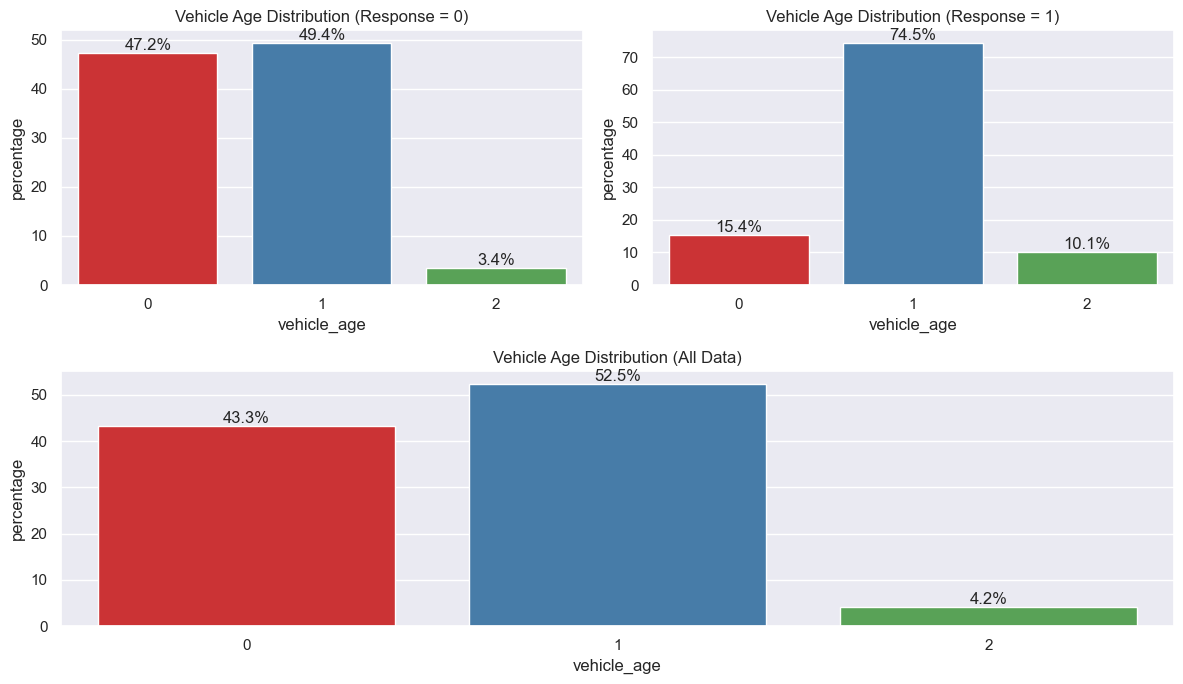

In [205]:
# Filter data by 'response' and get counts for 'vehicle_age_numeric'
aux0 = df3[df3['response'] == 0]['vehicle_age_numeric'].value_counts(normalize=True).reset_index()
aux0.columns = ['vehicle_age', 'percentage']
aux0['percentage'] *= 100  # Convert to percentage

aux1 = df3[df3['response'] == 1]['vehicle_age_numeric'].value_counts(normalize=True).reset_index()
aux1.columns = ['vehicle_age', 'percentage']
aux1['percentage'] *= 100  # Convert to percentage

aux2 = df3['vehicle_age_numeric'].value_counts(normalize=True).reset_index()
aux2.columns = ['vehicle_age', 'percentage']
aux2['percentage'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(2, 2)

# Plot for response == 0
plt.subplot(gs[0, 0])
ax1 = sns.barplot(x='vehicle_age', y='percentage', data=aux0, palette='Set1')
plt.title('Vehicle Age Distribution (Response = 0)')
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

# Plot for response == 1
plt.subplot(gs[0, 1])
ax2 = sns.barplot(x='vehicle_age', y='percentage', data=aux1, palette='Set1')
plt.title('Vehicle Age Distribution (Response = 1)')
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

# Plotting All Data
plt.subplot(gs[1, :])
ax3 = sns.barplot(x='vehicle_age', y='percentage', data=aux2, palette='Set1')
plt.title('Vehicle Age Distribution (All Data)')
for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

<span style="font-size:15px">Most positive responses (75%) come from owners of cars that are 1 to 2 years old. Interestingly, only 15% of positive responses are from brand new cars (less than 1 year old), which contradicts my initial hypothesis that new car owners would be the most interested in acquiring vehicle insurance.</span>

### Policy Sales Channel